In [1]:
# Imports
from glotaran_tools import SimulatedSpectralTimetrace
import numpy as np

In [2]:
# simple simulation

# Parameters

time_max = 1500
time_delta = 1
wavenum_min = 12820
wavenum_max = 15120
wavenum_delta = 4
locations = [14705, 13513, 14492, 14388, 14184, 13986]
widths = [400, 1000, 300, 200, 350, 330]
locations = [14705, 13513, 14492, 14388, 14184, 13986]
amplitudes = [1, 0.2, 1, 1, 1, 1]
# TODO: rates should be specified as decay rates, thus without the negative symbol, this is handeled internally
rates = [-.006667, -.006667, -0.00333, -0.00035, -0.0303, -0.000909]

In [3]:
# generate the dataset
simulation = SimulatedSpectralTimetrace(amplitudes, rates, locations, widths, wavenum_min, wavenum_max, wavenum_delta,
                                        time_max, time_delta)

In [4]:
# Imports for plotting

import matplotlib.pyplot as plt
%matplotlib notebook

In [5]:
# plot 2 channels
fig1 = plt.figure()
plt.plot(simulation.observations(), simulation.get_channel(12820))
plt.plot(simulation.observations(), simulation.get_channels()[5])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


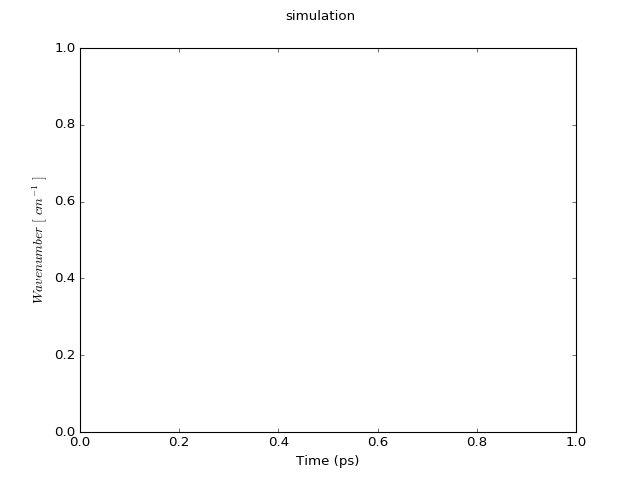

Exception: Spectral unit is pixel.

In [7]:
# Plot full trace

fig2 = plt.figure()
fig2.suptitle(simulation.label())
plt.xlabel('Time (ps)')
plt.ylabel('$Wavenumber\ [\ cm^{-1}\ ]$')
plt.pcolormesh(simulation.observations(), simulation.wavelengths(), simulation.get_channels())
plt.show()

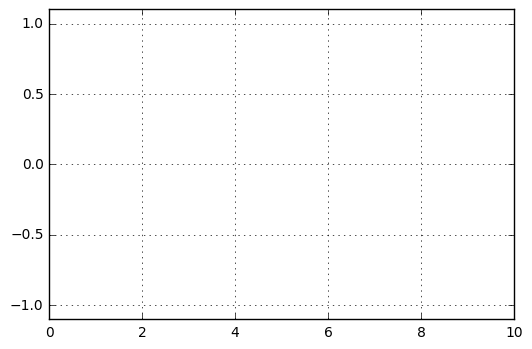

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


def data_gen(t=0):
    cnt = 0
    while cnt < 1000:
        cnt += 1
        t += 0.1
        yield t, np.sin(2*np.pi*t) * np.exp(-t/10.)


def init():
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlim(0, 10)
    del xdata[:]
    del ydata[:]
    line.set_data(xdata, ydata)
    return line,

fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.grid()
xdata, ydata = [], []


def run(data):
    # update the data
    t, y = data
    xdata.append(t)
    ydata.append(y)
    xmin, xmax = ax.get_xlim()

    if t >= xmax:
        ax.set_xlim(xmin, 2*xmax)
        ax.figure.canvas.draw()
    line.set_data(xdata, ydata)

    return line,

ani = animation.FuncAnimation(fig, run, data_gen, blit=False, interval=10,
                              repeat=False, init_func=init)
plt.show()